# Laboratorio 3 - Práctica 1
### Gonzalo de las Heras de Matías - Jorge de la Fuente Tagarro
## Olimpiadas Tokio 2020

![title](Images/olimpiadas.jpg)
### Objetivo 

Se quiere crear un modelo que permita saber si un atleta español va a tener medalla de oro, plata o bronce
en los juegos olímpicos de Tokio que se celebrarán en 2020. Para ello, tendremos en cuenta el lugar que
ocupan en un espacio n-dimensional donde n es el número de características de cada atleta.

Para ello usaremos el dataset “Juegos olímpicos” que se encuentra en Moodle. Elige el clasificador que más se
adapte de entre los vistos en clase y usa scikit-learn junto con las librerías que necesites para resolver las
siguientes cuestiones.

### Cuestiones 

<ol type="o">
  <li>Haz todo el preprocesamiento para crear un set de entrenamiento y otro de validación qué permita
clasificar atletas qué tengan sólo las características necesarias. Aparte de los totalmente necesarios,
usaremos como atributos: Sexo, Edad, Altura y Peso. Explica qué has hecho y porqué.</li>
  <li>Prueba con distintas configuraciones de las dos métricas principales. La primera métrica corresponde
al número de individuos que usarás para clasificar una nueva instancia y la segunda cómo vas a medir
la cercanía de esa nueva instancia con el resto.</li>
  <li>Elige la mejor configuración entre las anteriores. Para ello dibuja una tabla ver cómo evoluciona la
clasificación. Dibuja los resultados que se obtienen con ambas configuraciones elegidas cómo las
mejores.</li>
   <li>Utiliza el clasificador para saber que medalla es más probable que ganen Bruno Hortelano (Athletycs),
Carolina Marín (Badminton) o la selección femenina de baloncesto (Basketball)</li>
</ol>

#### Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from IPython.display import clear_output
from pylab import *

#### Funciones

In [2]:
"""
Función para, dado un dataset, encontrar el parámetro K óptimo para un modelo de clasificación 
basado en KNeighbors.
    @param x_train: Conjunto de entrenamiento (x).
    @param x_test: Conjunto de pruebas (x).
    @param y_train: Conjunto de entrenamiento(y).
    @param y_test: Conjunto de pruebas (y).
    @param patient: Veces que aguanta el algoritmos sin parar cuando se cumple la condición de finalizacióm stop.
    @param stop: Mejora a partir de la cual se para el algoritmo.
    @param metrica_distancia: Métrica para medir la distancia entre puntos.
"""
def CrearModeloKNeighborsKOptima(x_train, x_test, y_train, y_test, stop, patient, metrica_distancia):
    
    # Array de precisión en la predicción sobre el conjunto de validación.
    precisiones = [0]

    # Array de errores en la predicción sobre el conjunto de validación.
    errores = [100]
    
    # K inicial.
    k = 1
    
    # Variable de finalización.
    terminado = False
    
    # Precisión de K-1.
    precision_ant = 0

    # Bucle de búsqueda de la mejor 
    while terminado is False:
        
        # Creación del modelo.
        model = KNeighborsClassifier(n_neighbors=k, metric=metrica_distancia)
        model.fit(x_train, y_train)
        
        # Cálculo de la precisión y el error.
        precision = round(accuracy_score(model.predict(x_test), y_test), 3) *100 
        error = round(100 - precision, 3) 
        precisiones.append(precision)
        errores.append(error)
        
        # Comprobación de la condición de finalización del algoritmo.
        if (precision - precision_ant) < stop:
            if patient != 0:
                # Se cumple la condición de finalización pero todavía hay paciencia, el algoritmo sigue.
                patient -= 1
                precision_ant = precision
                k += 1
            else:
                # Ya no hay paciencia, se acaba el algoritmo.
                terminado = True
        else:
            # Continua el algoritmo.
            precision_ant = precision
            k += 1

    # Composición dela gráfica de progreso del error y la precisión.
    fig, ax1 = subplots(figsize=(20, 10))
    ax1.plot(precisiones, label='Precisión', color='g', marker='o')
    ax1.plot(errores, label='Error', color='r', marker='o', )
    fig.suptitle('Evolución de la precisión/error según K', fontsize=20)
    plt.xlabel('K')
    plt.ylabel("Porcentaje")
    axes = plt.gca()
    axes.set_xlim([0, k])
    axes.set_ylim([0,100])
    legend(loc='upper left')
    ax1.grid(True)
    
    # Mostramos la gráfica de progreso del error y la precisión.
    plt.show()
    
    # Imprimirmos por pantalla el resultado de la búsqueda.
    print("El parámetro K recomendado es: " + str(k) + " con un " + str(precisiones[k-1]) + "% de precisión"
         + " para la métrica: " + metrica_distancia)

"""
Función para, dada una predicción, devolver una tabla con el % de probabilidad de cada medalla.
    @param resultados: Array de probabilidades predecidas.
    @param show: Indica si se muestra la tabla de resultados desde la misma función.
    @return: Devuelve la tabla con el % de probabilidad de cada medalla.
"""
def PredecirMedalla(resultados, show = True):
    
    # Tabla de resultados.
    resultado = pd.DataFrame()
    
    # Posibles medallas (incluye ninguna).
    resultado["Medalla"] = ["Gold", "Silver", "Bronze", "NoM"]

    porcentajes = []
    
    # Colocamos cada porcentaje en la celda correspondiente.
    for medalla in ["Gold", "Silver", "Bronze", "NoM"]:
        porcentajes.append(round(resultados[encoderMedalla.transform([medalla])[0]] * 100, 1))

    resultado["%"] = porcentajes
    
    # Mostramos la tabla si así se indica.
    if show:
        display(resultado)
        
    return resultado

#### Dirección del dataset

In [3]:
DIR_DATASET = "Datos/olimpiadas.csv"

## 1. Preparación del dataset

<font color="blue">Cargamos el dataset de datos olímpicos</font>

In [4]:
Datos = pd.read_csv(DIR_DATASET)
Datos.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### 1.1. Preprocesamiento del dataset

<font color="blue"> Eliminamos las columnas que no nos aportan información para nuestro caso de uso. Queremos clasificar a partir de las características físicas de los competidores.</font>

In [5]:
del Datos["ID"]
del Datos["NOC"]
del Datos["Games"]
del Datos["Year"]
del Datos["Season"]
del Datos["Event"]
del Datos["City"]
Datos.head()

,Name,Sex,Age,Height,Weight,Team,Sport,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,Judo,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Speed Skating,NaN


#### 1.2 Limpiamos los campos que son nulos.
<br>
<font color="blue">Contamos los campos nulos por cada columna.</font>

In [6]:
nulos = pd.DataFrame(Datos.isnull().sum(), columns=["Número de nulos"])
nulos

,Número de nulos
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
Sport,0
Medal,231333


<font color="blue">Rellenamos las medallas a nulos con una cadena 'NoM' que indica que no ha obtenido medalla. El resto de filas con edad, altura y peso nulos los eliminamos del dataset.</font>

In [7]:
# Rellenamos los campos nulos de la medalla con "NoM" (No Medalla).
Datos['Medal'].fillna('NoM', inplace = True)

# Eliminamos las filas cuyos datos que nos interesan están a nulo.
Datos = Datos.drop(Datos[Datos["Age"].isnull() == True].index)
Datos = Datos.drop(Datos[Datos["Height"].isnull() == True].index)
Datos = Datos.drop(Datos[Datos["Weight"].isnull() == True].index)

<font color="blue">Volvemos a contar los registros nulos para cerciorarnos de que ya hemos limpiado todos los campos nulos.</font>

In [8]:
nulos = pd.DataFrame(Datos.isnull().sum(), columns=["Número de nulos"])
nulos

,Número de nulos
Name,0
Sex,0
Age,0
Height,0
Weight,0
Team,0
Sport,0
Medal,0


<font color="blue">Reseamos el índice del dataset.</font>

In [9]:
Datos = Datos.reset_index(drop=True)
Datos.head()

,Name,Sex,Age,Height,Weight,Team,Sport,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,Basketball,NoM
1,A Lamusi,M,23.0,170.0,60.0,China,Judo,NoM
2,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Speed Skating,NoM
3,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Speed Skating,NoM
4,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,Speed Skating,NoM


### 2. Transformación del dataset
#### 2.1 Transformamos los atributos categóricos a numéricos.

In [10]:
# Transformación a datos numéricos de la columna "Sex".
encoderSexo = preprocessing.LabelEncoder()
encoderSexo.fit(Datos["Sex"])
Datos["Sex"] = encoderSexo.transform(Datos["Sex"])

# Transformación a datos numéricos de la columna "Sport".
encoderDeporte = preprocessing.LabelEncoder()
encoderDeporte.fit(Datos["Sport"])
Datos["Sport"] = encoderDeporte.transform(Datos["Sport"])

# Transformación a datos numéricos de la columna "Medal".
encoderMedalla = preprocessing.LabelEncoder()
encoderMedalla.fit(Datos["Medal"])
Datos["Medal"] = encoderMedalla.transform(Datos["Medal"])

# Transformación a datos numéricos de la columna "País".
encoderPais = preprocessing.LabelEncoder()
encoderPais.fit(Datos["Team"])
Datos["Team"] = encoderPais.transform(Datos["Team"])

# Mostramos el dataset.
Datos.head()

,Name,Sex,Age,Height,Weight,Team,Sport,Medal
0,A Dijiang,1,24.0,180.0,80.0,114,6,2
1,A Lamusi,1,23.0,170.0,60.0,114,26,2
2,Christine Jacoba Aaftink,0,21.0,185.0,82.0,374,43,2
3,Christine Jacoba Aaftink,0,21.0,185.0,82.0,374,43,2
4,Christine Jacoba Aaftink,0,25.0,185.0,82.0,374,43,2


<font color="blue">Incluimos en la lista de propiedades que se van de emplear para el modelo de clasificación la variable "País" porque pertenecer a un país u otro tienen relavancia. Por ejemplo, en Jamaica, el atletismo es un deporte cultural suyo, se práctica más que otros deportes, se invierten más recursos... etc, produciendo mejores deportistas en atletismo.</font>

### 3. Creación del modelo KNN
#### 3.1 Cálculo de la mejor variable K para el clasificador
<br><font color="blue">Separamos del dataset completo el conjunto de variables para predecir y el valor esperado. Además eliminamos la variable "Nombre" que no nos aportan información.</font>

In [11]:
# Copia del dataset original.
x_dataset = Datos.copy()

# Eliminamos la columna "Nombre" que no aporta información.
del x_dataset["Name"]

# Separamos la columna del valor esperado de la predicción.
y_dataset = x_dataset["Medal"]
del x_dataset["Medal"]

# Reseteamos el índice del dataset.
x_dataset = x_dataset.reset_index(drop=True)

# Mostramos la cabeza del dataset.
x_dataset.head()

,Sex,Age,Height,Weight,Team,Sport
0,1,24.0,180.0,80.0,114,6
1,1,23.0,170.0,60.0,114,26
2,0,21.0,185.0,82.0,374,43
3,0,21.0,185.0,82.0,374,43
4,0,25.0,185.0,82.0,374,43


<font color="blue">Buscamos el mejor parámetro K y la mejor métrica para el clasificador.</font>


Probando división: 0.3
-----


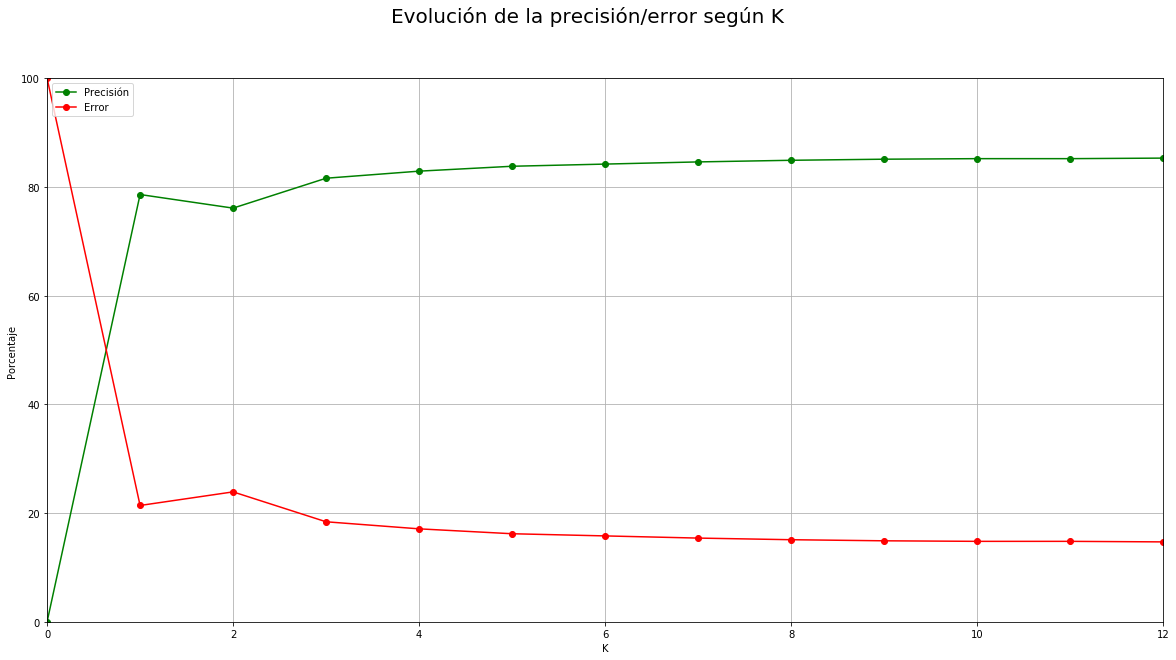

El parámetro K recomendado es: 12 con un 85.2% de precisión para la métrica: euclidean


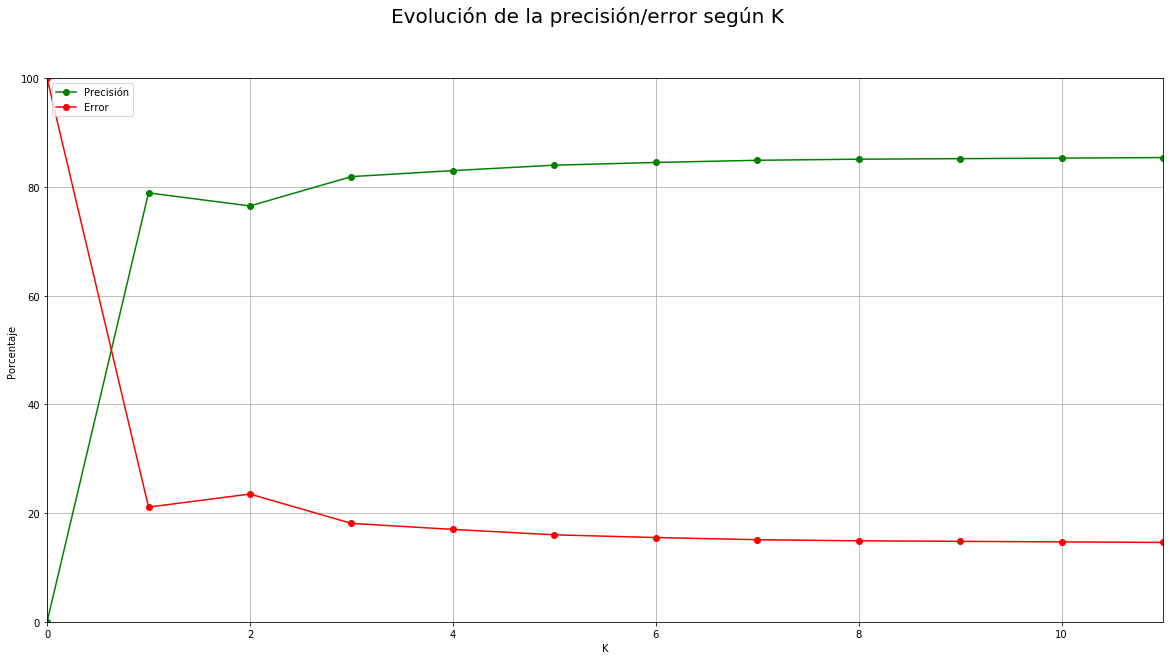

El parámetro K recomendado es: 11 con un 85.3% de precisión para la métrica: manhattan


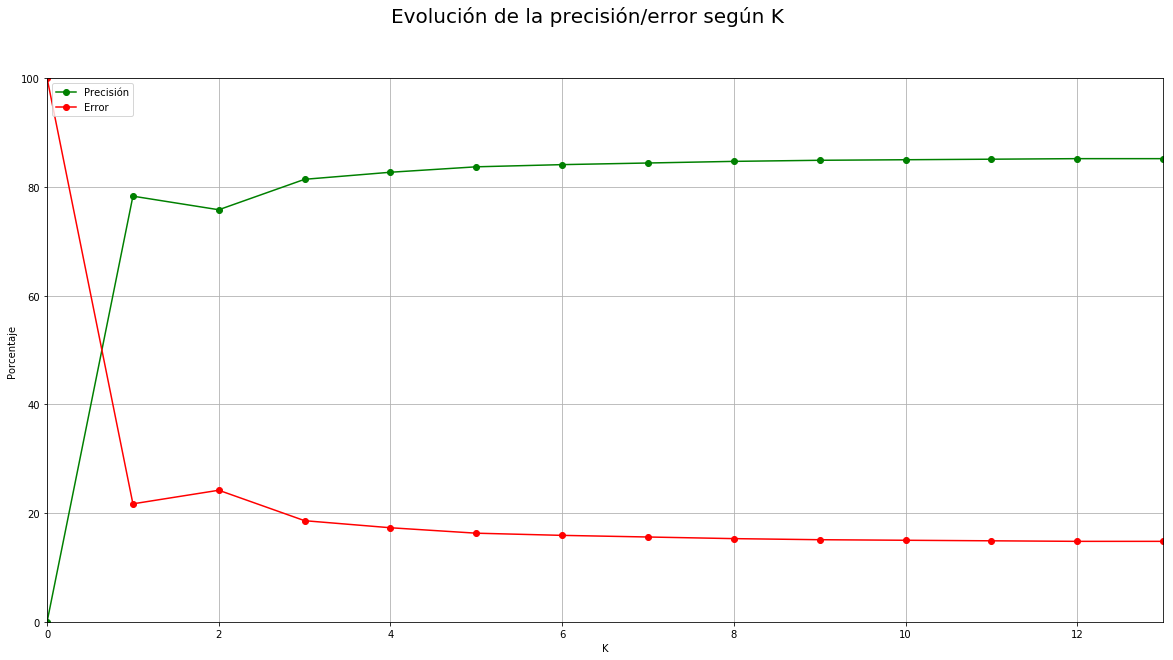

El parámetro K recomendado es: 13 con un 85.2% de precisión para la métrica: chebyshev

Probando división: 0.25
-----


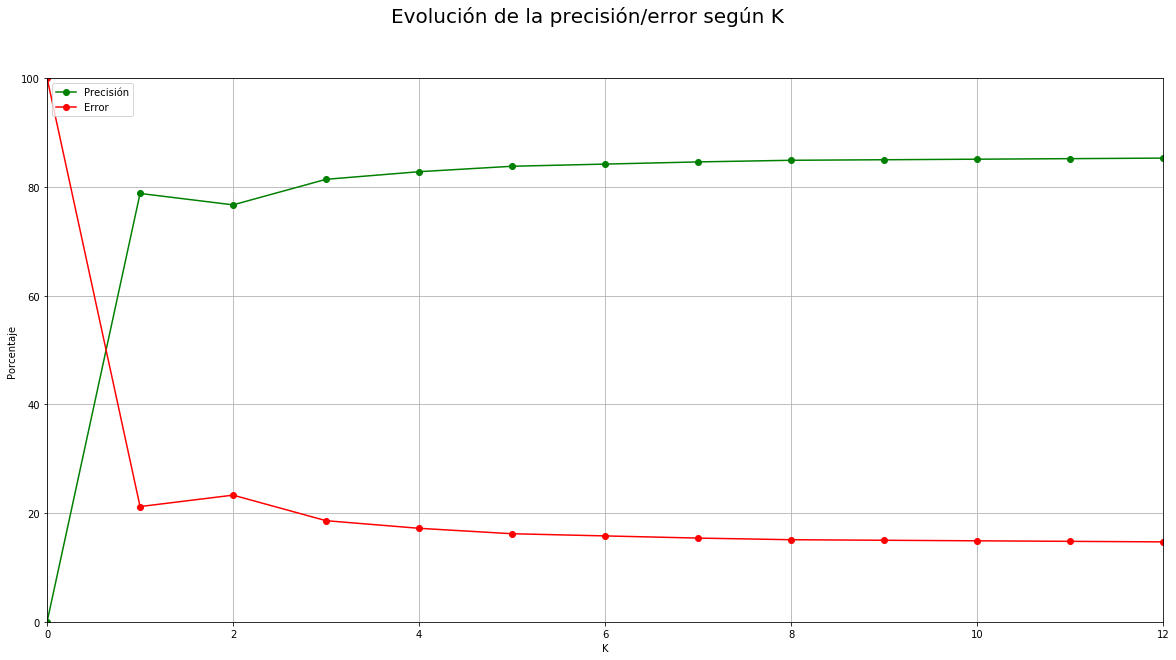

El parámetro K recomendado es: 12 con un 85.2% de precisión para la métrica: euclidean


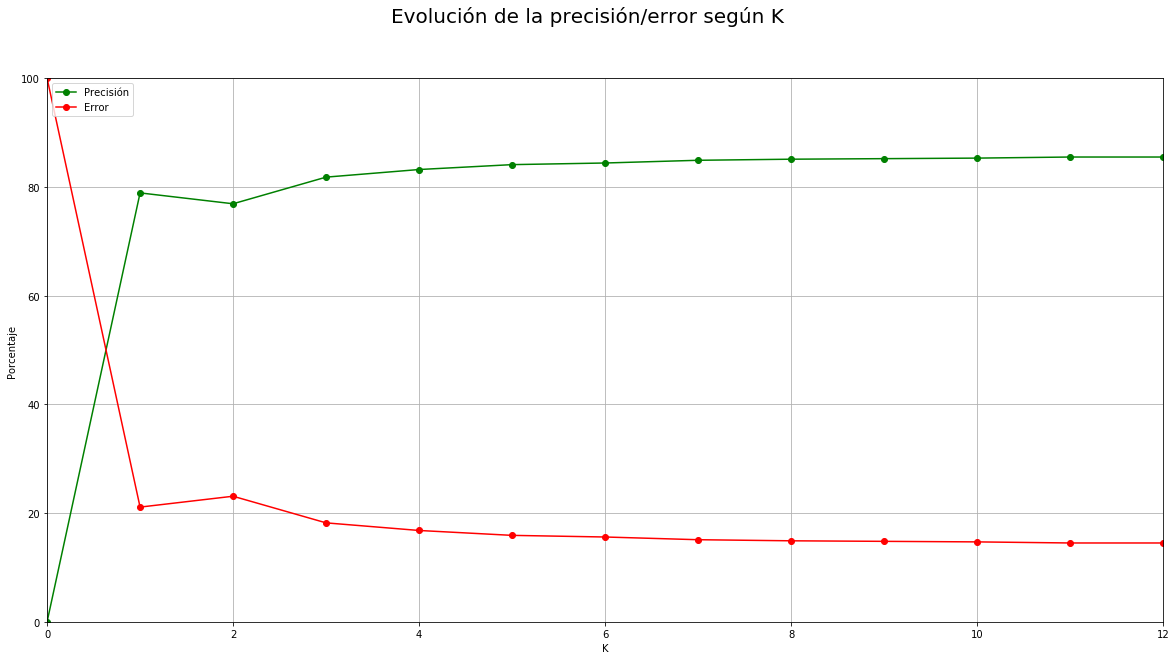

El parámetro K recomendado es: 12 con un 85.5% de precisión para la métrica: manhattan


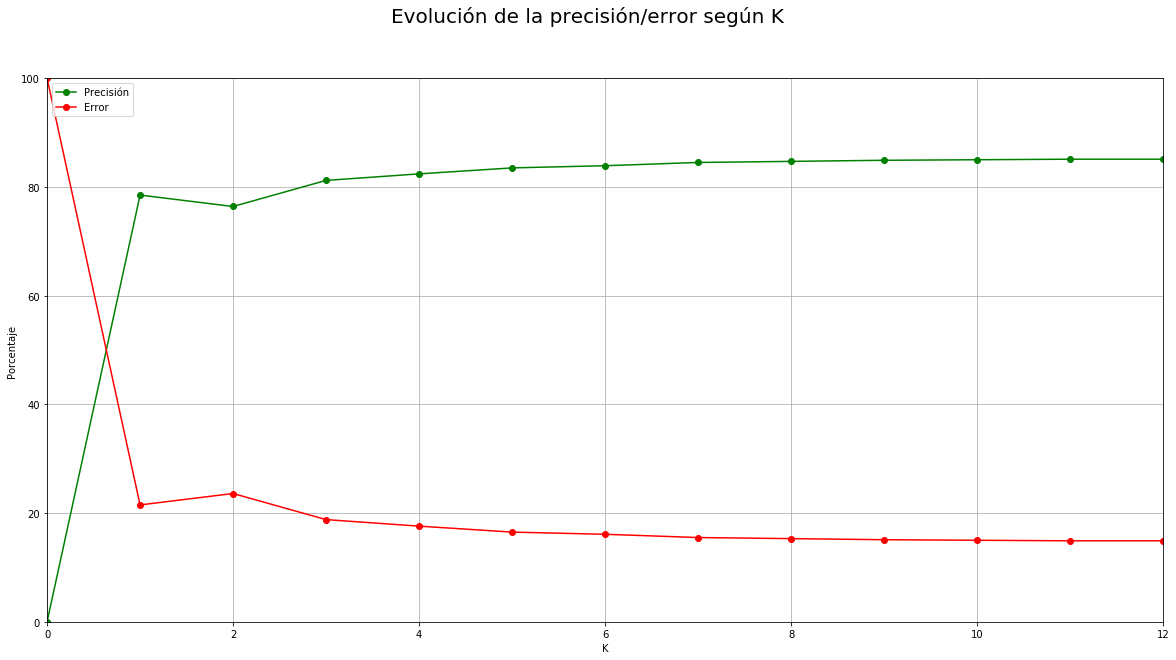

El parámetro K recomendado es: 12 con un 85.1% de precisión para la métrica: chebyshev

Probando división: 0.2
-----


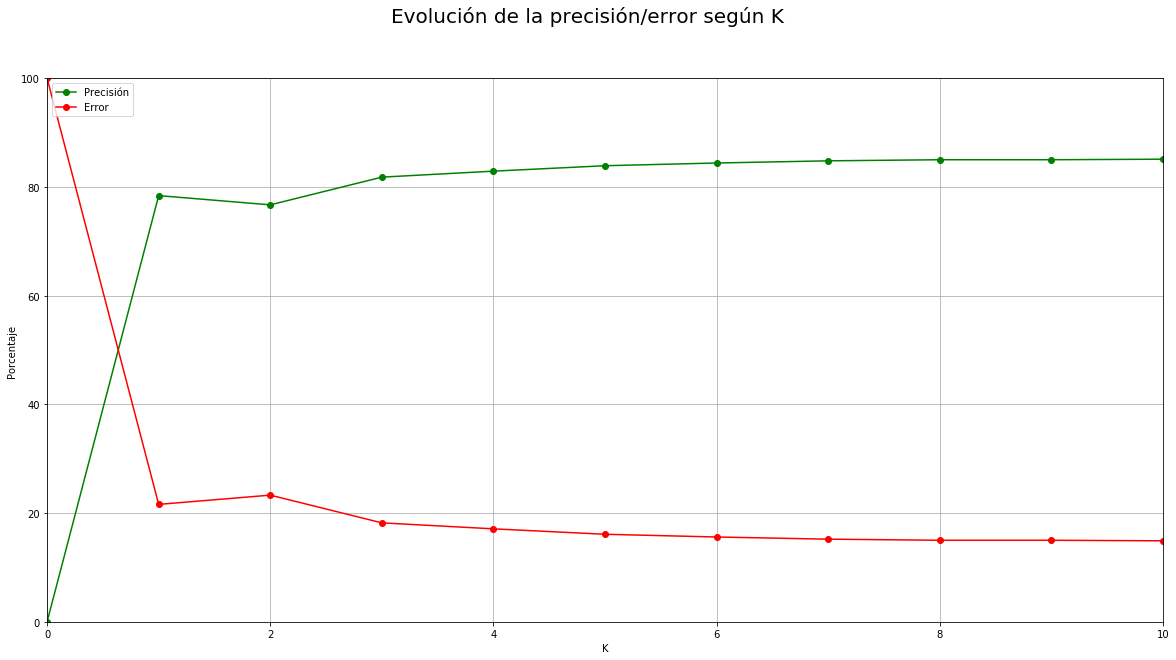

El parámetro K recomendado es: 10 con un 85.0% de precisión para la métrica: euclidean


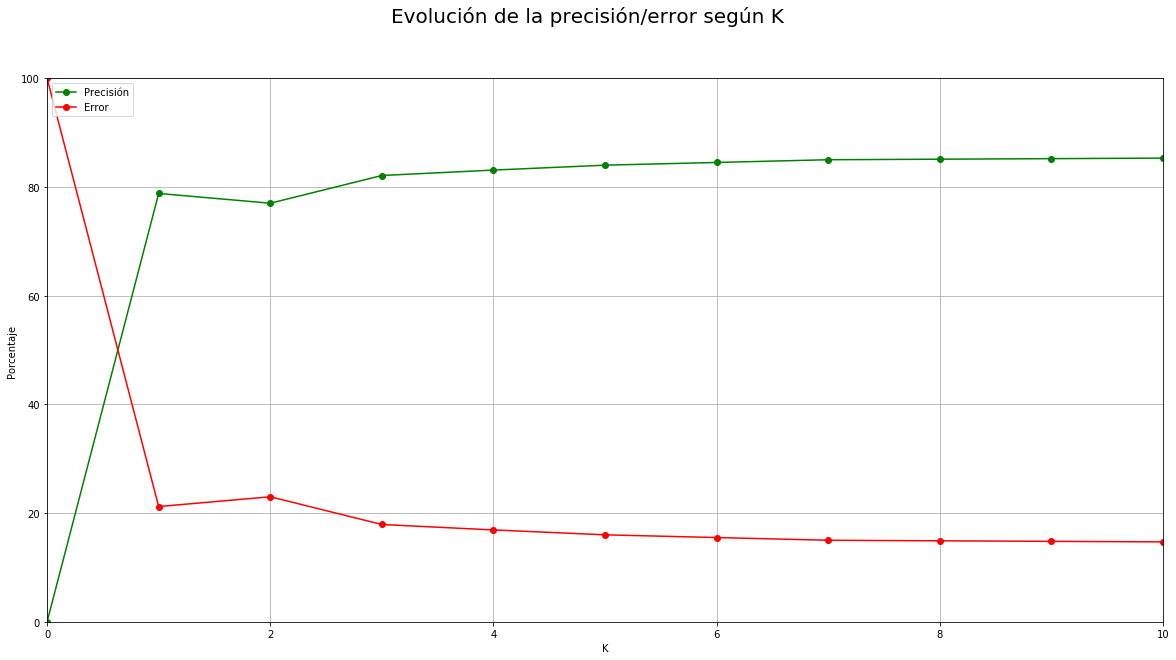

El parámetro K recomendado es: 10 con un 85.2% de precisión para la métrica: manhattan


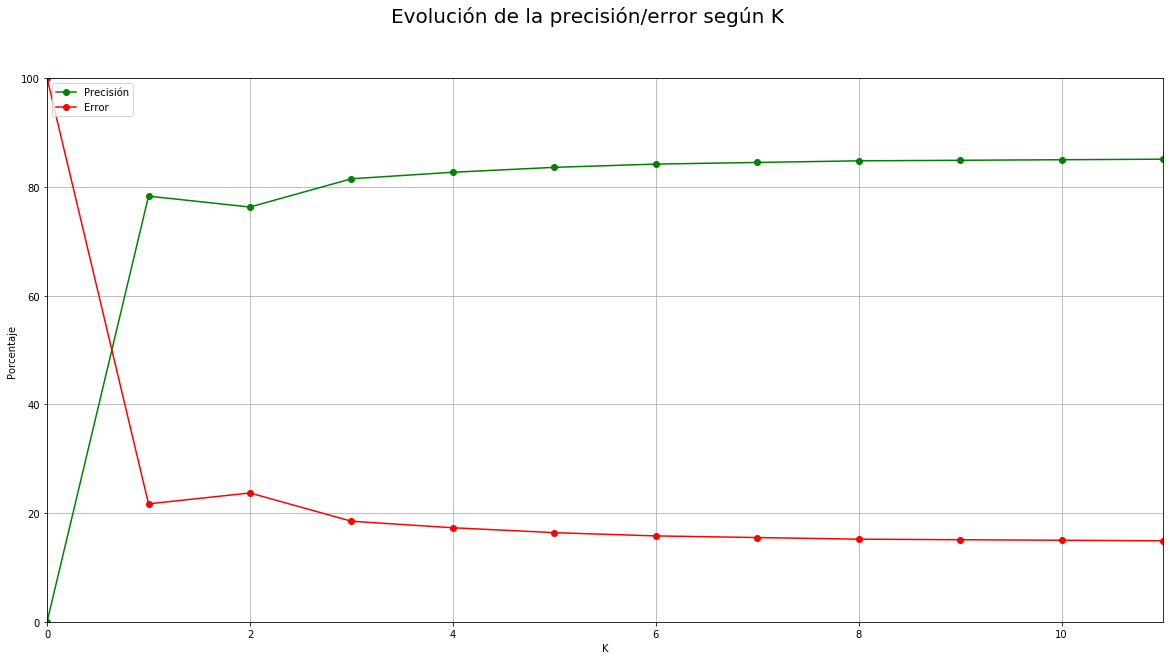

El parámetro K recomendado es: 11 con un 85.0% de precisión para la métrica: chebyshev

Probando división: 0.15
-----


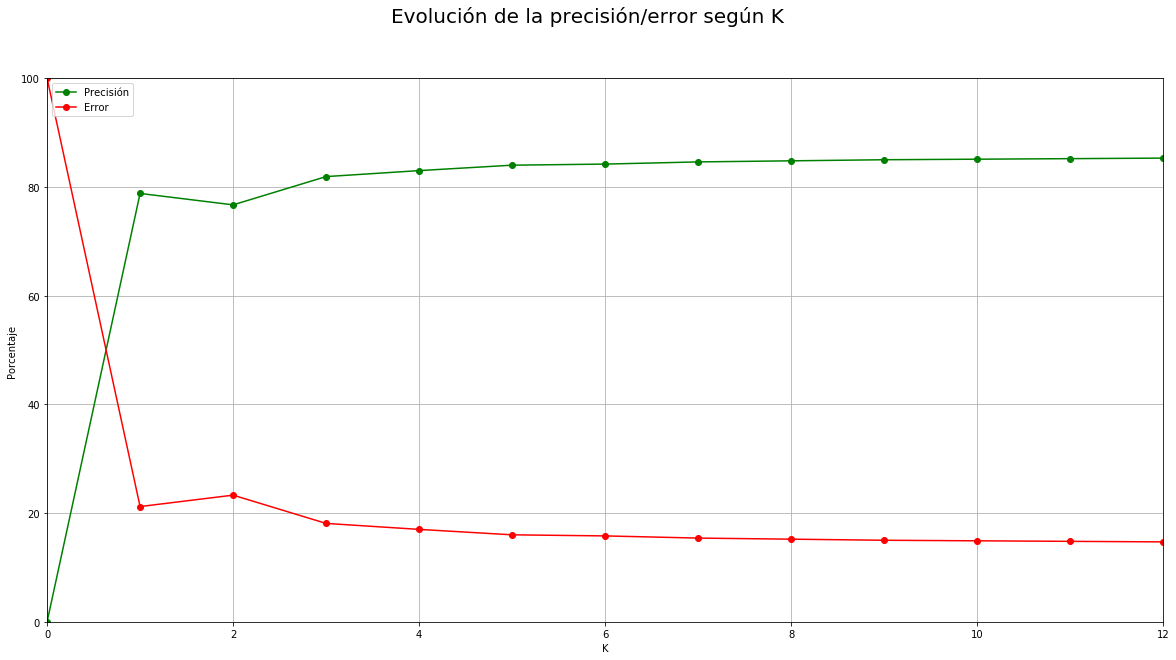

El parámetro K recomendado es: 12 con un 85.2% de precisión para la métrica: euclidean


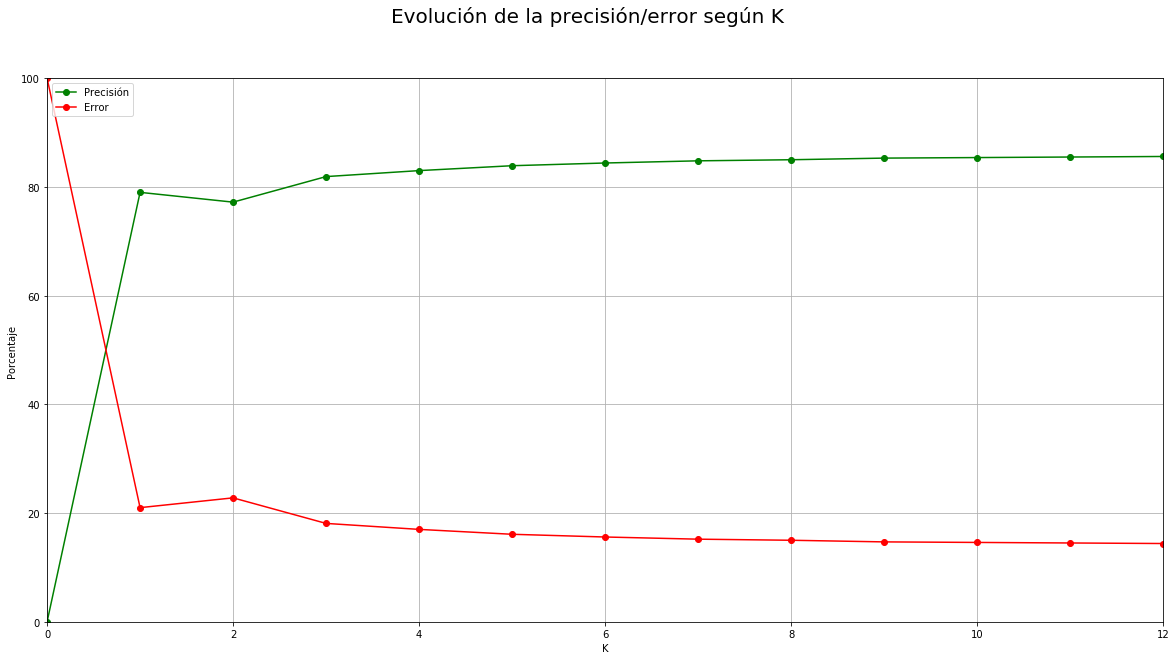

El parámetro K recomendado es: 12 con un 85.5% de precisión para la métrica: manhattan


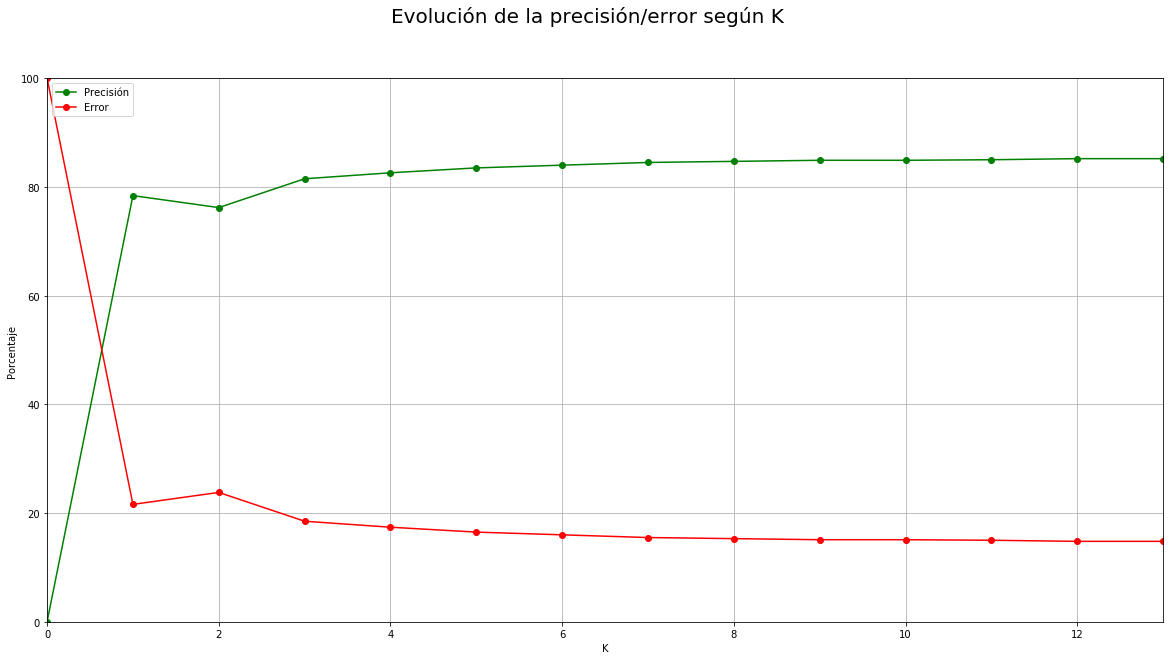

El parámetro K recomendado es: 13 con un 85.2% de precisión para la métrica: chebyshev

Probando división: 0.1
-----


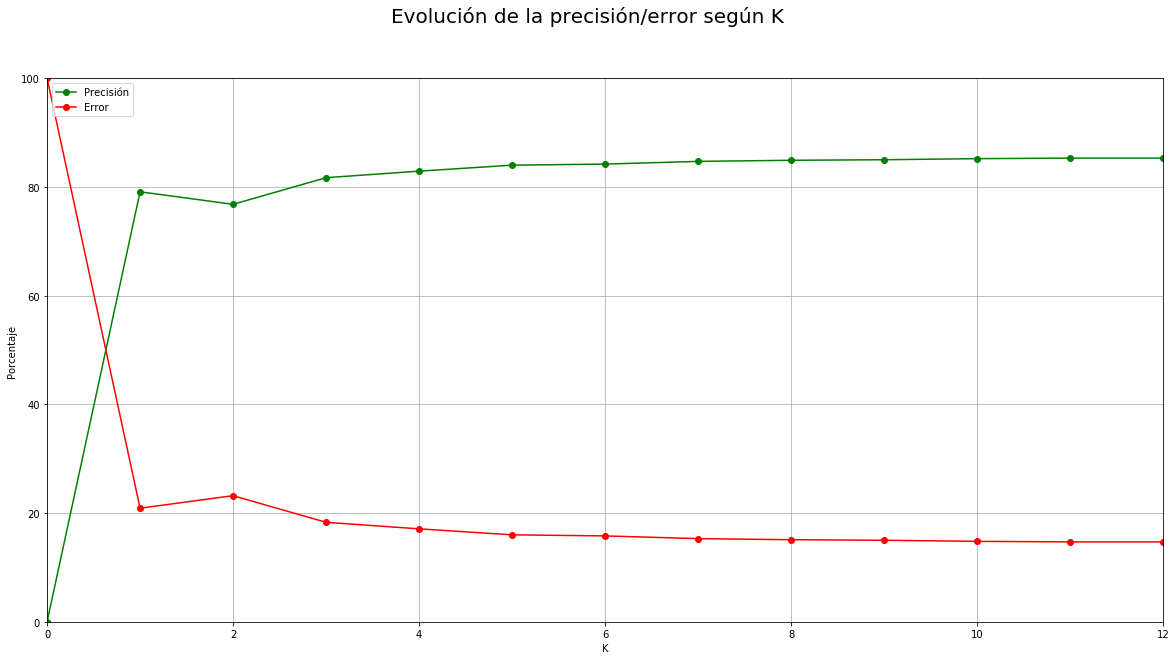

El parámetro K recomendado es: 12 con un 85.3% de precisión para la métrica: euclidean


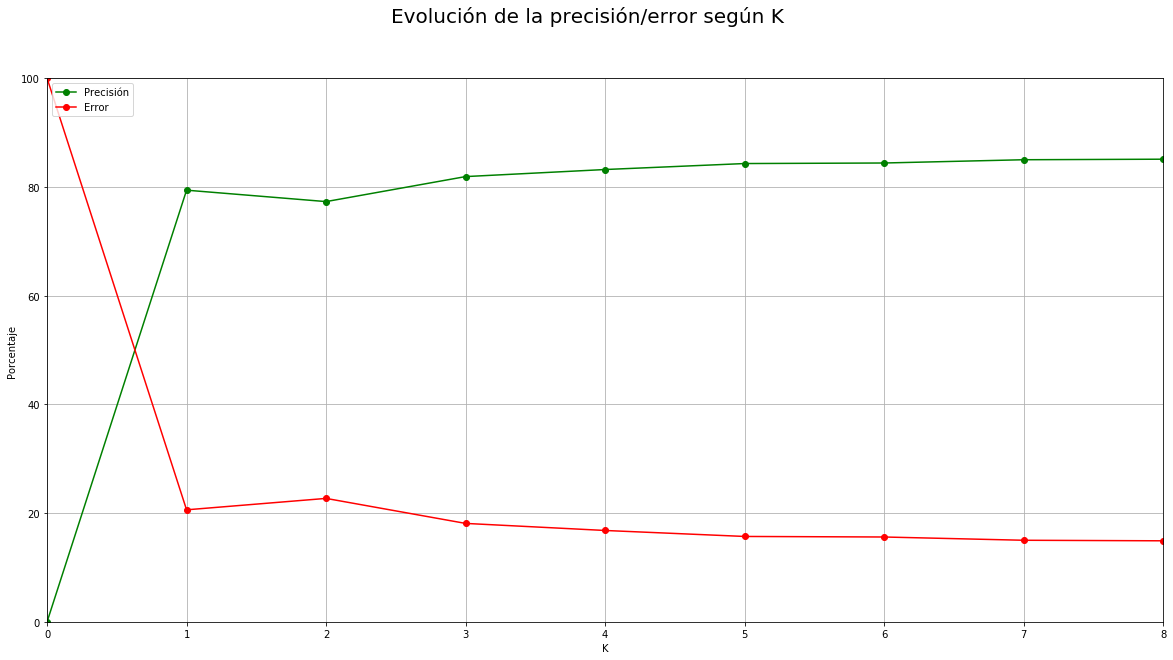

El parámetro K recomendado es: 8 con un 85.0% de precisión para la métrica: manhattan


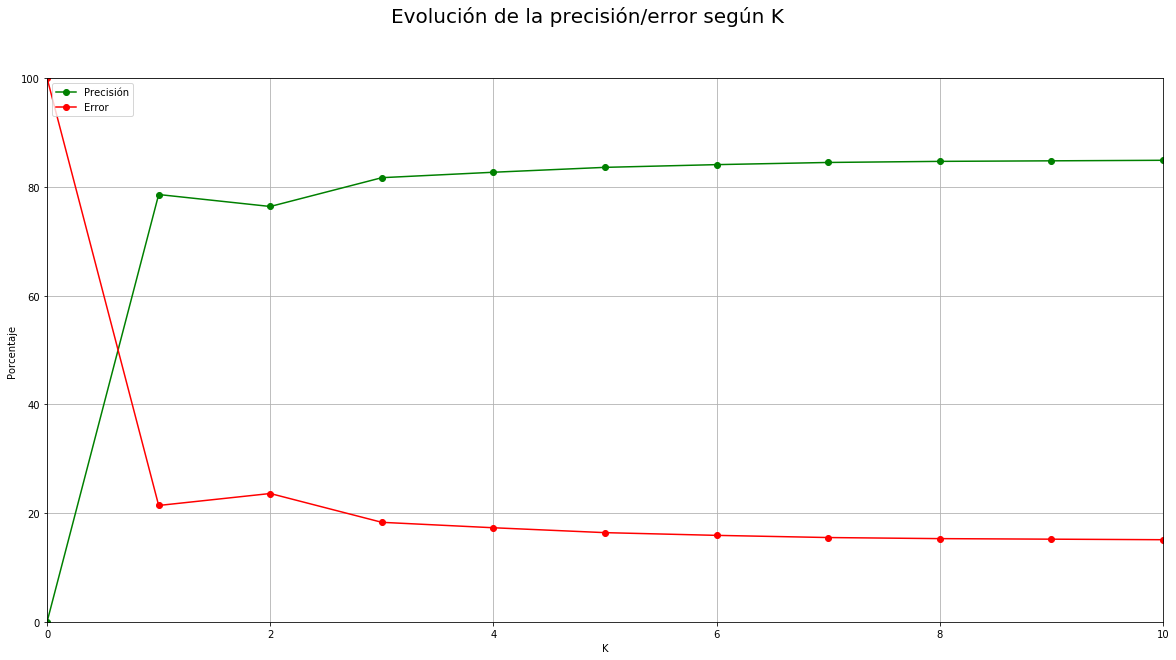

El parámetro K recomendado es: 10 con un 84.8% de precisión para la métrica: chebyshev


In [12]:
metricas = ["euclidean", "manhattan", "chebyshev"]
divisiones = [0.3, 0.25, 0.2, 0.15, 0.1]

for division in divisiones:
    x_entrenam, x_val, y_entrenam, y_val = train_test_split(x_dataset, y_dataset, \
                                                    stratify=y_dataset, test_size=division)
    
    print("")
    print("Probando división: " + str(division))
    print("-----")
    
    for metrica in metricas:
        CrearModeloKNeighborsKOptima(x_entrenam, x_val, y_entrenam, y_val, 0.1, 2, metrica)

<font color="blue">La precisión del modelo depende más del parámetro K que del tipo de métrica seleccionada. Crearemos el modelo con la k óptima para la métrica "euclidean" que tiene una precisión del 85%.
</font>

In [13]:
x_entrenam, x_val, y_entrenam, y_val = train_test_split(x_dataset, y_dataset, stratify=y_dataset, test_size=0.2)

modeloKNN = KNeighborsClassifier(n_neighbors=12, metric="euclidean")
modeloKNN.fit(x_entrenam, y_entrenam)

print("La precisión del modelo final es del: " + str(round(accuracy_score(modeloKNN.predict(x_val), y_val), 3) *100) + "%")

La precisión del modelo final es del: 85.3%


#### 3.2 Probamos con un atleta ejemplo que conozcamos para validar los resultados.
<br><font color="blue">Precedimos la probabilidad de ganar medalla de Usain Bolt. Sus características son:
<ul>
    <li>Sexo: 1</li>
    <li>Edad: 25</li>
    <li>Altura: 196</li>
    <li>Peso: 95</li>
    <li>Sport: 3</li>
</ul>
</font>

In [14]:
prediccion = PredecirMedalla(resultados=modeloKNN.predict_proba([[1,25,196,95,268,3]])[0])

,Medalla,%
0,Gold,41.7
1,Silver,0.0
2,Bronze,0.0
3,NoM,58.3


<font color="blue">En principio lo más normal es no ganar las olimpiadas porque solo gana un participante, sin embargo, sabemos que Usain Bolt es muy bueno en atletismo y ha ganado muchas medallas (casi todas las que ha disputado son de oro) por lo que es normal que el modelo prediga que va a ganar otra medalla de oro.</font>

### 4. Clasificación los atletas españoles
<br><font color="blue">Ahora que tenemos un modelo bien entrenado podemos proceder a predecir las medallas que van a obtener los atletas españoles propuestos.</font>

#### 4.1 Bruno Hortelado
<br>
<font color="blue"><ul>
    <li>Sexo: 1</li>
    <li>Edad: 27</li>
    <li>Altura: 180</li>
    <li>Peso: 70</li>
    <li>Sport: 3</li>
</ul></font>

In [15]:
prediccion = PredecirMedalla(resultados=modeloKNN.predict_proba([[1,27,180,70,533,3]])[0])

,Medalla,%
0,Gold,0.0
1,Silver,0.0
2,Bronze,0.0
3,NoM,100.0


<font color="blue">La predicción dice que Bruno no va a ganar ninguna medalla. Tiene sentido, aunque haya tenido grandes actuaciones en otros campeonatos nunca ha tenido un gran papel en los Juegos Olímpicos.</font>

#### 4.1 Carolina Marín
<br>
<font color="blue">
<ul>
    <li>Sexo: 0</li>
    <li>Edad: 23</li>
    <li>Altura: 172</li>
    <li>Peso: 65</li>
    <li>Sport: 4</li>
</ul></font>

In [16]:
prediccion = PredecirMedalla(resultados=modeloKNN.predict_proba([[0,23,172,65,533,4]])[0])

,Medalla,%
0,Gold,16.7
1,Silver,0.0
2,Bronze,0.0
3,NoM,83.3


<font color="blue">La predicción dice que Carolina va a ganar la medalla de oro que, teniendo en cuenta que es una deportista de clase mundial con varios campeonatos internaciones ganados en los que se incluyen 1 medalla de oro olímpica, tiene mucho sentido.</font>

#### 4.3 Selección Española de Baloncesto Femenino
<font color="blue">Sus características las calcularemos según la media de las características de las jugadores de la selección.

In [17]:
chicas = Datos[(Datos["Team"] == 533) & (Datos["Sport"] == 6) & (Datos["Sex"] == 0)]
del chicas["Medal"]
del chicas["Name"]
chicas = chicas.reset_index(drop=True)

dataset = pd.DataFrame()

for index, row in chicas.iterrows():
    if index == 0:
        dataset = PredecirMedalla(resultados=modeloKNN.predict_proba([row.values])[0], show=False)
    else:
        dataset_temp = PredecirMedalla(resultados=modeloKNN.predict_proba([row.values])[0], show=False)
        dataset["%"] = dataset["%"].add(dataset_temp["%"], fill_value=0)
        
dataset["%"] = dataset["%"] / len(chicas)
dataset

,Medalla,%
0,Gold,1.489744
1,Silver,13.889744
2,Bronze,4.051282
3,NoM,80.558974


<font color="blue">La predicción dice que la medalla más probable de ganar es la de plata. España está tienendo una época muy buena en cuanto al baloncesto lo cual provoca que alcance la final olímpica pero que, sin embargo, al encontrarse casi siempre con la selección de EEUU (en la final) que, casi siempre gana todos los campeonatos que disputa, complica que ganen el oro.</font>

## ANEXO I
<br><font color="blue">A priori podemos pensar que no conseguimos mejorar el modelo, porque estamos entrenando con datos de diversos deportes y sexos. Vamos a plantear un experimento para averiguar si estableciendo un mismo sexo y un mismo deporte podemos conseguir una mayor precisión en la predicción. Para ello, emplearemos la misma función usada anteriormente, que devuelve el mejor modelo posible.
<br><br>
Recordemos que la precisión del mejor modelo conseguido con el conjunto completo del dataset es del 85%.
</font>

#### Hombres y atletismo

<font color="blue">Separamos el dataset, dividimos en conjunto de entrenamiento y validación y probamos el modelo para medir su precisión.</font>

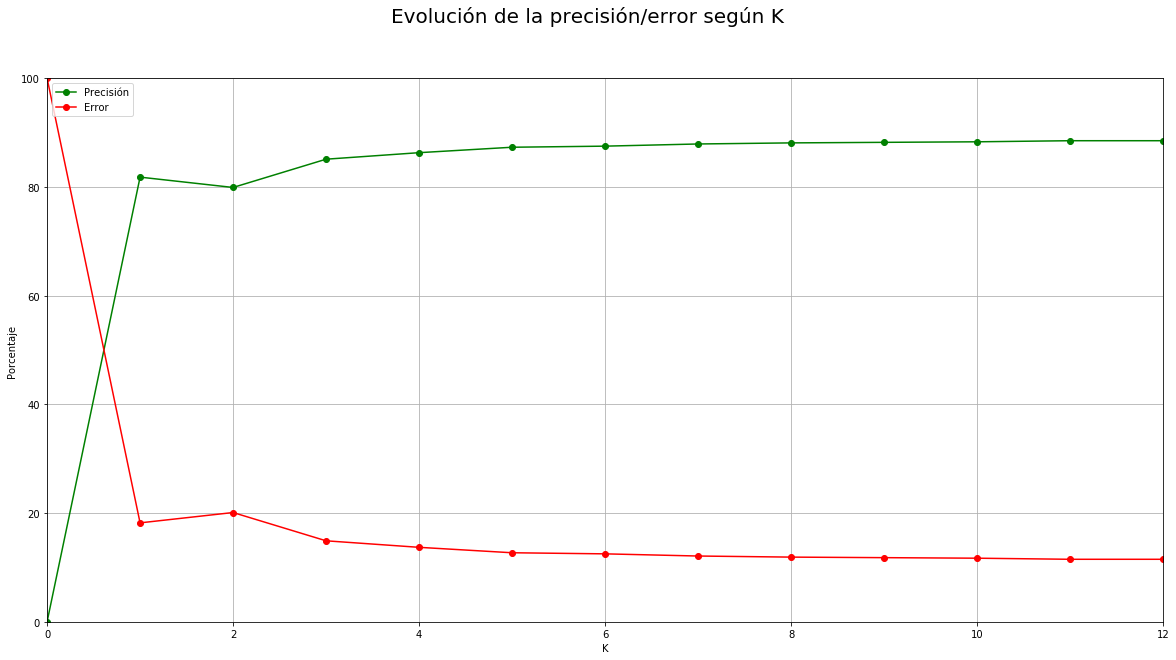

El parámetro K recomendado es: 12 con un 88.5% de precisión para la métrica: euclidean


In [18]:
# Filtramos por hombres y Athletics.
x_dataset_solo_hombres = Datos.loc[(Datos['Sex'] == 1) & (Datos["Sport"] == 3)]

# Eliminamos los campos que no aportan información-
del x_dataset_solo_hombres["Name"]
del x_dataset_solo_hombres["Sex"]
del x_dataset_solo_hombres["Sport"]

# Separamos la clase esperada.
y_dataset_solo_hombres = x_dataset_solo_hombres["Medal"]
del x_dataset_solo_hombres["Medal"]

# Reseteamos el índice.
x_dataset_solo_hombres = x_dataset_solo_hombres.reset_index(drop=True)

x_entrenam, x_val, y_entrenam, y_val = train_test_split(x_dataset_solo_hombres.values, y_dataset_solo_hombres.values, \
                                                    stratify=y_dataset_solo_hombres.values, test_size=0.2)

modeloKNN = CrearModeloKNeighborsKOptima(x_entrenam, x_val, y_entrenam, y_val, 0.1, 2, "euclidean")

<font color="blue">Confirmamos que aumentamos la precisión global del predictor para, en concreto, el caso de hombres en Athletics.</font>

#### Mujeres y badminton

<font color="blue">Separamos el dataset, dividimos en conjunto de entrenamiento y validación y probamos el modelo para medir su precisión.</font>

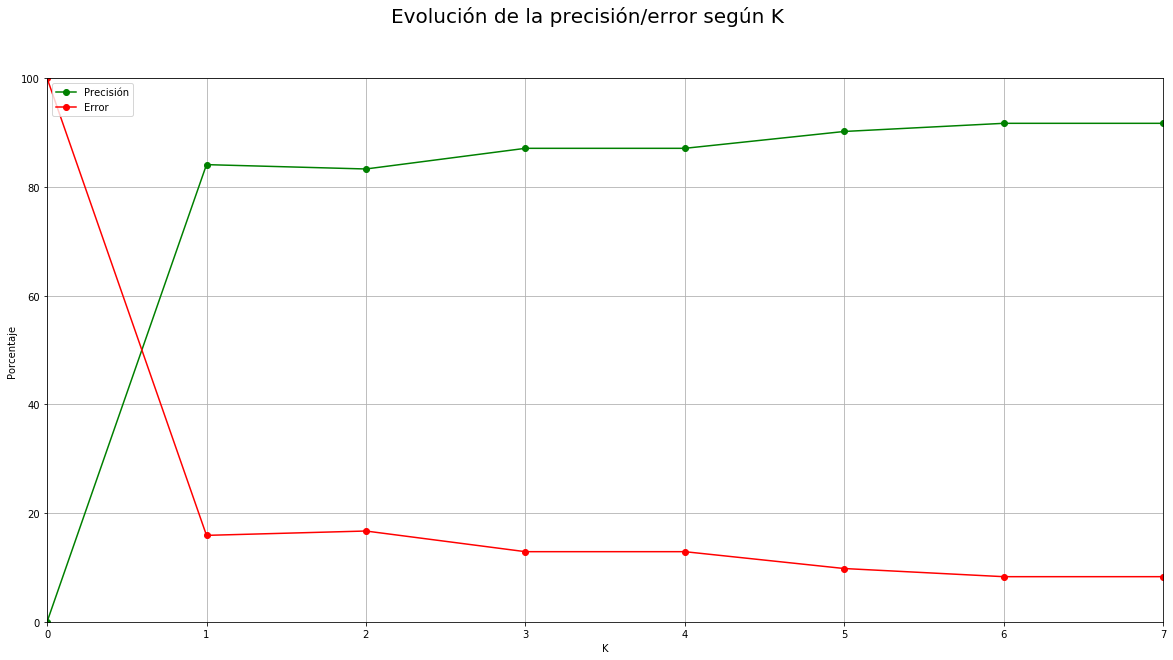

El parámetro K recomendado es: 7 con un 91.7% de precisión para la métrica: euclidean


In [19]:
x_dataset_mujeres_badminton = Datos.loc[(Datos['Sex'] == 0) & (Datos["Sport"] == 4)]
del x_dataset_mujeres_badminton["Name"]
del x_dataset_mujeres_badminton["Sex"]
del x_dataset_mujeres_badminton["Sport"]
y_dataset_mujeres_badminton = x_dataset_mujeres_badminton["Medal"]
del x_dataset_mujeres_badminton["Medal"]
x_dataset_mujeres_badminton = x_dataset_mujeres_badminton.reset_index(drop=True)

x_entrenam, x_val, y_entrenam, y_val = train_test_split(x_dataset_mujeres_badminton.values, y_dataset_mujeres_badminton.values, \
                                                    stratify=y_dataset_mujeres_badminton.values, test_size=0.2)

modeloKNN = CrearModeloKNeighborsKOptima(x_entrenam, x_val, y_entrenam, y_val, 0.1, 2, "euclidean")

<font color="blue">Confirmamos que aumentamos la precisión global del predictor para, en concreto, el caso de mujeres en badminton.</font>

#### Mujeres y baloncesto

<font color="blue">Separamos el dataset, dividimos en conjunto de entrenamiento y validación y probamos el modelo para medir su precisión.</font>

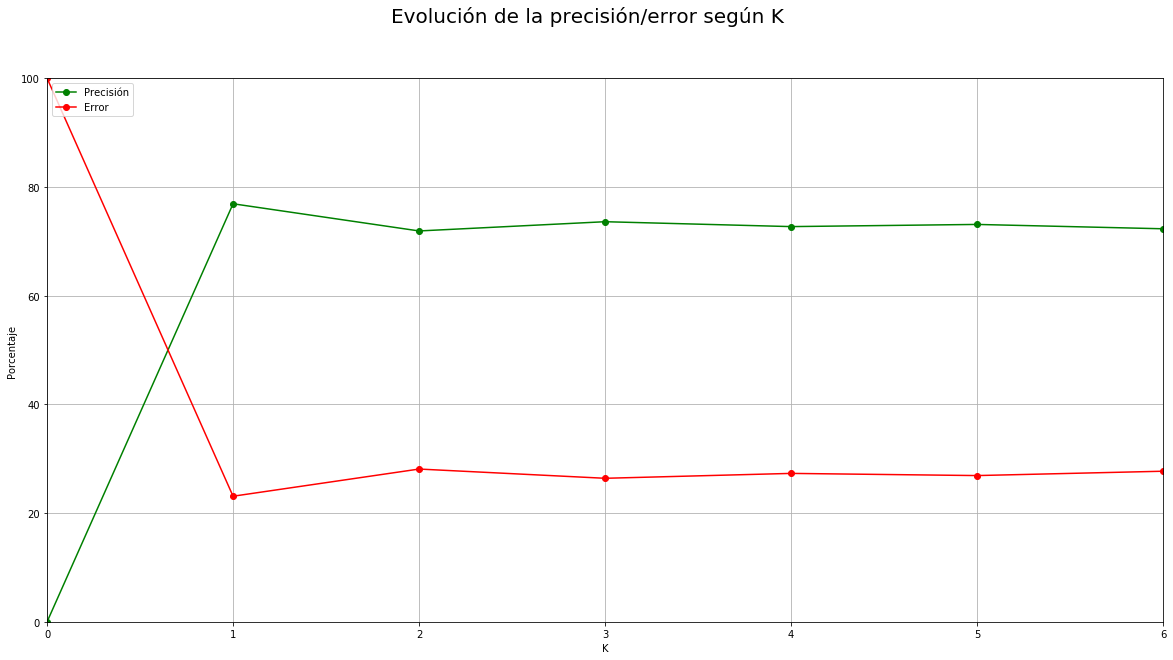

El parámetro K recomendado es: 6 con un 73.1% de precisión para la métrica: euclidean


In [20]:
x_dataset_mujeres_basket = Datos.loc[(Datos['Sex'] == 0) & (Datos["Sport"] == 6)]
del x_dataset_mujeres_basket["Name"]
del x_dataset_mujeres_basket["Sex"]
del x_dataset_mujeres_basket["Sport"]
y_dataset_mujeres_basket = x_dataset_mujeres_basket["Medal"]
del x_dataset_mujeres_basket["Medal"]
x_dataset_mujeres_basket = x_dataset_mujeres_basket.reset_index(drop=True)

x_entrenam, x_val, y_entrenam, y_val = train_test_split(x_dataset_mujeres_basket.values, y_dataset_mujeres_basket.values, \
                                                    stratify=y_dataset_mujeres_basket.values, test_size=0.2)

modeloKNN = CrearModeloKNeighborsKOptima(x_entrenam, x_val, y_entrenam, y_val, 0.1, 2, "euclidean")

<font color="blue">Para el caso de mujeres en el baloncesto, el modelo con el dataset sesgado no mejora al anterior con el conjunto completo del dataset. Esto puede deberse a que, en el baloncesto, hay muchos jugadores con características físicas muy distintas (los bases tienen mucha estatura que los pivots) dentro de un mismo equipo que puede ser ganador de medalla, es más difícil clasificar los individuos.</font>

## Referencias

<ul>
    <li>https://www.quora.com/How-can-I-choose-the-best-K-in-KNN-K-nearest-neighbour-classification</li>
    <li>https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html</li>
    <li>https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html</li>
    <li>Apuntes de la asignatura</li>
</ul>